# Library

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Undefitting and Overfitting : KNN

> ## Table Of Contents

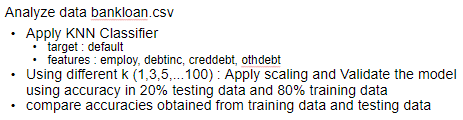

> ## Dataset : Bankloan Dataset

In [ ]:
bankloan = pd.read_csv('bankloan.csv')

In [ ]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [ ]:
X = bankloan[fitur]
y = bankloan[target]

> ## Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, # stratified random sampling
    test_size = 0.2, 
    random_state = 2020) # make the result consistent

> ## Standardization Process

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

> ## Selection process of Factor k

In [ ]:
k = range(1,100,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_scaled,y_train)

  y_predict_train = knn.predict(X_train_scaled)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = knn.predict(X_test_scaled)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    score = acc_score
    best_k = i

Text(0, 0.5, 'accuracy')

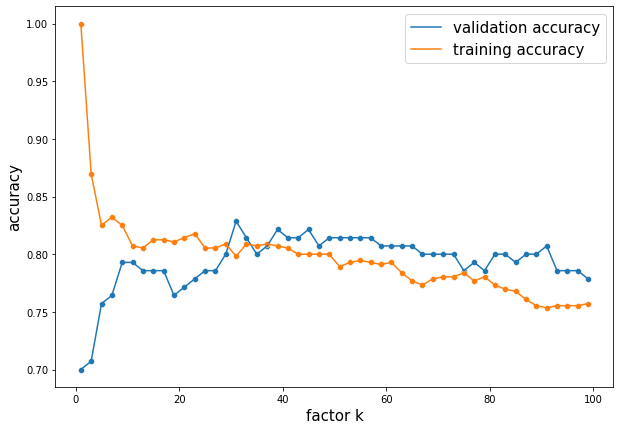

In [ ]:
plt.figure(figsize = (10,7))
sns.lineplot(k,testing_accuracies)
sns.scatterplot(k,testing_accuracies)
sns.lineplot(k,training_accuracies)
sns.scatterplot(k,training_accuracies)
plt.legend(['validation accuracy','training accuracy'], fontsize = 15)
plt.xlabel('factor k', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
# plt.xticks(list(k))

In [ ]:
print('best k:', best_k)
print('accuracy:', score)

best k: 31
accuracy: 0.8285714285714286


1. The best factor k for this case is 31 with 82.86 % accuracy
1. For k = 1, the KNN method achieve 100 accuracy in training set but very bad accuracy in validation set
1. For k below 31, the ML method is getting overfitting while for k greater than 31 the ML method is getting underfitting

# Model Complexity : Decision Tree

> ## Table Of Contents

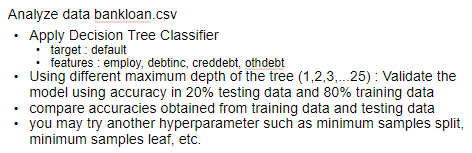

> ## Selection Process of Maximum Depth

In [ ]:
depths = range(1,25)
testing_accuracies = []
training_accuracies = []
score = 0

for i in depths:
  tree = DecisionTreeClassifier(
      criterion = 'entropy',
      max_depth = i)
  tree.fit(X_train,y_train)

  y_predict_train = tree.predict(X_train)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = tree.predict(X_test)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    best_depth = i
    score = acc_score

Text(0, 0.5, 'accuracy')

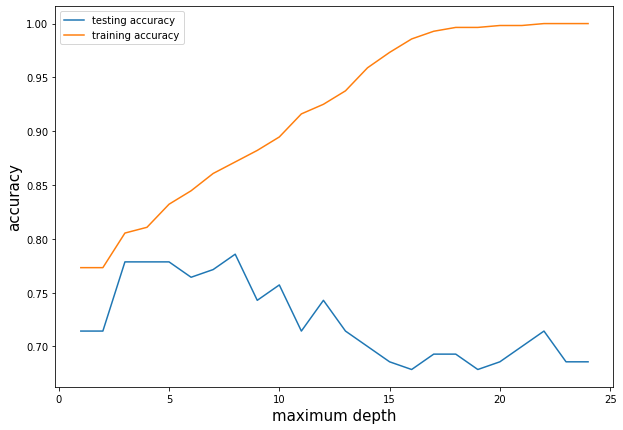

In [ ]:
plt.figure(figsize = (10,7))
sns.lineplot(depths,testing_accuracies)
sns.lineplot(depths,training_accuracies)
plt.legend(['testing accuracy','training accuracy'])
plt.xlabel('maximum depth', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)

In [ ]:
print('best maximum depth:', best_depth)
print('accuracy:', score)

best maximum depth: 8
accuracy: 0.7857142857142857


1. The best maximum depth for this case is 8 with 78.57 % accuracy.
1. The deeper the tree, the ML method getting overfitting
1. when the max depth 25, the accuracy in training set almost 100% while in test set the accuracy is very bad.